In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from PyUncertainNumber.pba.pbox_base import Pbox
from PyUncertainNumber.pba.cbox import *
from PyUncertainNumber.pba.params import Params
from intervals import Interval as I, intervalise

In [2]:
from PyUncertainNumber.pba.cbox.cbox import *
import random
random.seed(30)

In [3]:
%matplotlib inline
%load_ext rich
%load_ext autoreload
%autoreload 2

### Bernoulli

In [4]:
bdata = np.random.uniform(size=25) > 0.35

In [5]:
cbox_bernoulli = CBbernoulli_p(bdata)

In [6]:
cbox_bernoulli

Cbox ~ beta([np.int64(19), np.int64(7)], [np.int64(20), np.int64(6)])

In [7]:
cbox_bernoulli.bound_params

([np.int64(19), np.int64(7)], [np.int64(20), np.int64(6)])

In [8]:
# nextvalue
nextvalue_bernoulli = CBbernoulli(bdata)
nextvalue_bernoulli

Pbox: ~ bernoulli(range=['0.00', '1.00'], mean=[0.1771, 0.1971], var=[0.1775, 0.1967])

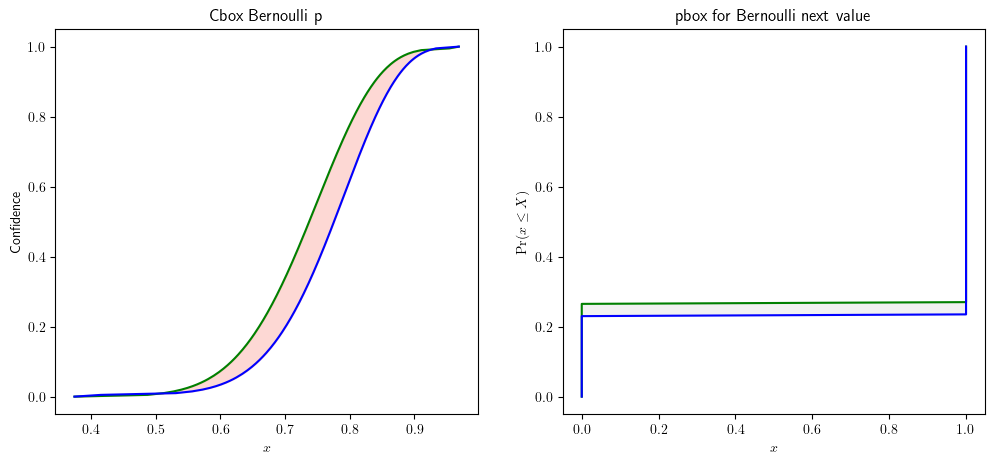

In [9]:
with mpl.rc_context({"text.usetex": True}):
    fig, axs = plt.subplots(1,2, figsize=(12, 5))
    _ = cbox_bernoulli.display(ax = axs[0], style='band', parameter_name='Bernoulli p')
    _ = nextvalue_bernoulli.display(ax= axs[1], style='band', title='pbox for Bernoulli next value')

### Bionomial

In [10]:
# Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.
# get a sample named `d` from a binomial of n=12, p=0.6
d = np.random.binomial(12, 0.6, 5)
# d

In [11]:
cbox_binomial = CBbinomial_p(d, 12)

In [12]:
cbox_binomial

Cbox ~ beta([np.int64(40), np.int64(21)], [np.int64(41), np.int64(20)])

In [13]:
# nextvalue
nextvalue_bernoulli = CBbinomial(d, 12)
nextvalue_bernoulli

Pbox: ~ betanomial(range=['1.00', '12.00'], mean=[3.1138, 3.562], var=[3.1138, 3.562])

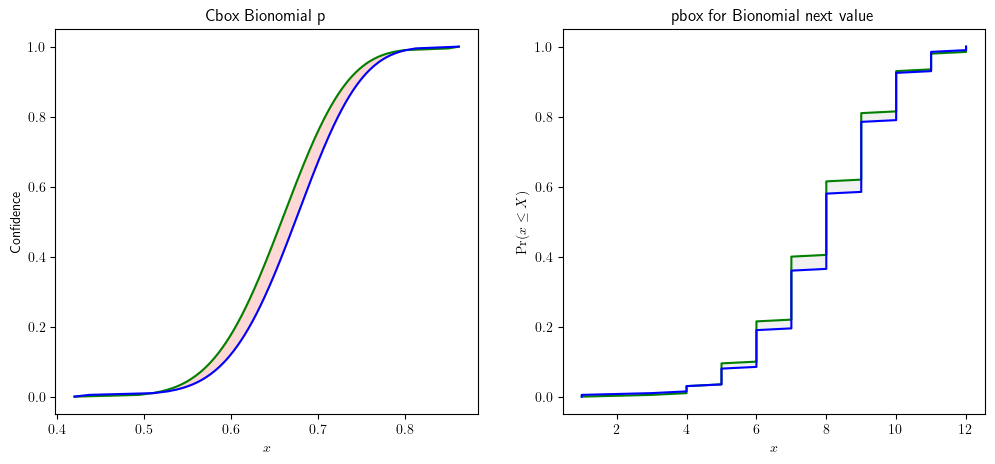

In [14]:
with mpl.rc_context({"text.usetex": True}):
    fig, axs = plt.subplots(1,2, figsize=(12, 5))
    _ = cbox_binomial.display(ax = axs[0], style='band', parameter_name='Bionomial p')
    _ = nextvalue_bernoulli.display(ax= axs[1], style='band', title='pbox for Bionomial next value')

### Possion

In [15]:
idata = np.round(np.random.uniform(size=25) * 16)
# idata

In [16]:
cbox_poisson = CBpoisson_mean(idata)
cbox_poisson

Cbox ~ gamma([np.float64(215.0), 0.04], [np.float64(216.0), 0.04])

In [17]:
nextvalue_poisson = CBpoisson(idata)
nextvalue_poisson

Pbox: ~ nbinom(range=['0.00', '22.00'], mean=[9.5718, 9.7718], var=[9.5718, 9.7718])

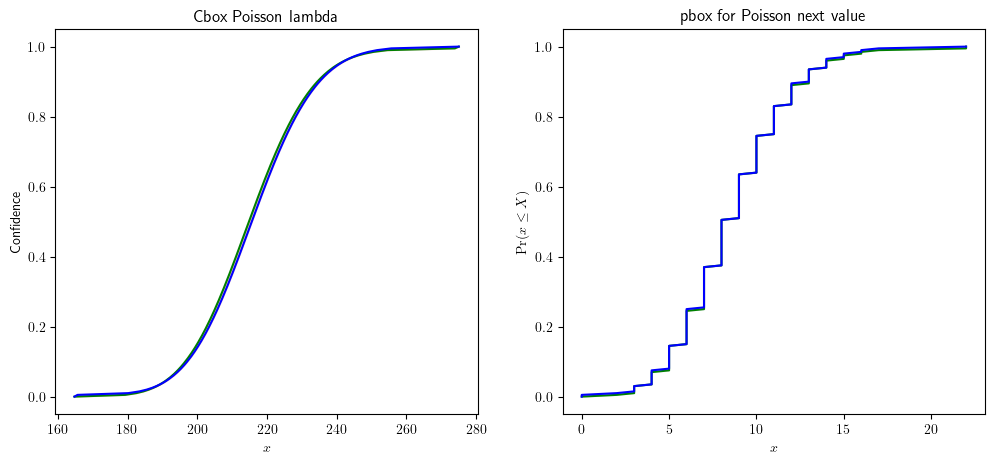

In [18]:
with mpl.rc_context({"text.usetex": True}):
    fig, axs = plt.subplots(1,2, figsize=(12, 5))
    _ = cbox_poisson.display(ax = axs[0], style='band', parameter_name = 'Poisson lambda')
    _ = nextvalue_poisson.display(ax= axs[1], style='band', title='pbox for Poisson next value')

### Exponential

- note: lamba returns a confidence distribution as opposed to a cbox;
- nextvalue distribution is not analytic but sample based.

In [19]:
data = np.random.uniform(size=25) * 30

In [20]:
cbox_exponential = CBexponential_lambda(data)
cbox_exponential

Cbox ~ gamma(25, np.float64(0.0030830624271898435))

In [21]:
# samples-based CDF
nextvalue_exponential = CBexponential(data)
nextvalue_exponential

Pbox: ~ (range=['0.00', '105.75'], mean=193.3155, var=193.3155)

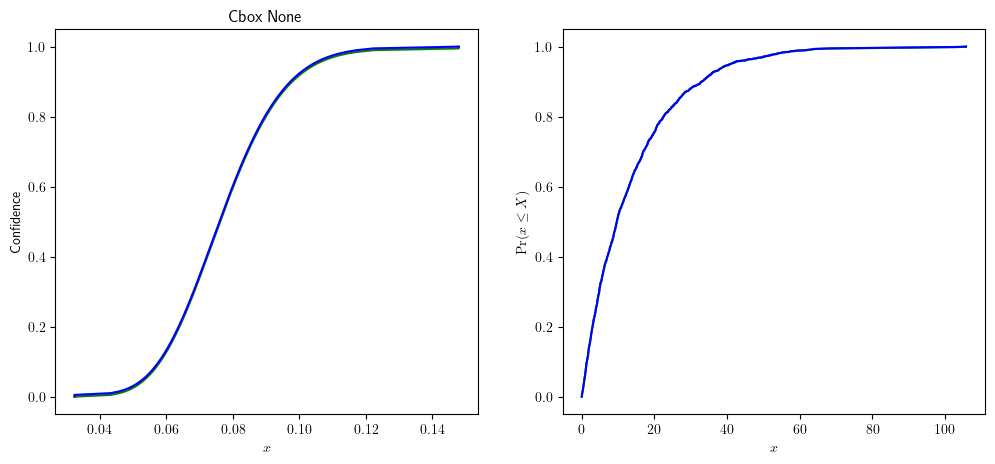

In [22]:
with mpl.rc_context({"text.usetex": True}):
    fig, axs = plt.subplots(1,2, figsize=(12, 5))
    _ = cbox_exponential.display(ax = axs[0], style='band')
    _ = nextvalue_exponential.display(ax= axs[1], style='band')

### Gaussian

- below shows the **Gaussian Confidence distribution** in the cases of both **precise** sample data and **imprevise** sample data

In [23]:
interval_censored_data = [[8,11], [5.5,6.9], [1.3,0.3], [3.5,7.5], [0.8,1], [2.8,4.2], [1.8,5.2], [2.2,5.2], [3.5,5.7], [5.3,6.1]]
interval_censored_data_i = intervalise(interval_censored_data)
# interval_censored_data_i

In [24]:
# for interval-valued data
iv_cbox = CBnormal_mu(interval_censored_data_i)

In [25]:
iv_cbox

Cbox ~ NoneNone

In [26]:
# for precise data 
lowend_data_cbox = CBnormal_mu(interval_censored_data_i.lo)

In [27]:
lowend_data_cbox

Cbox ~ None(np.float64(3.4699999999999998), np.float64(0.6684384788445381))

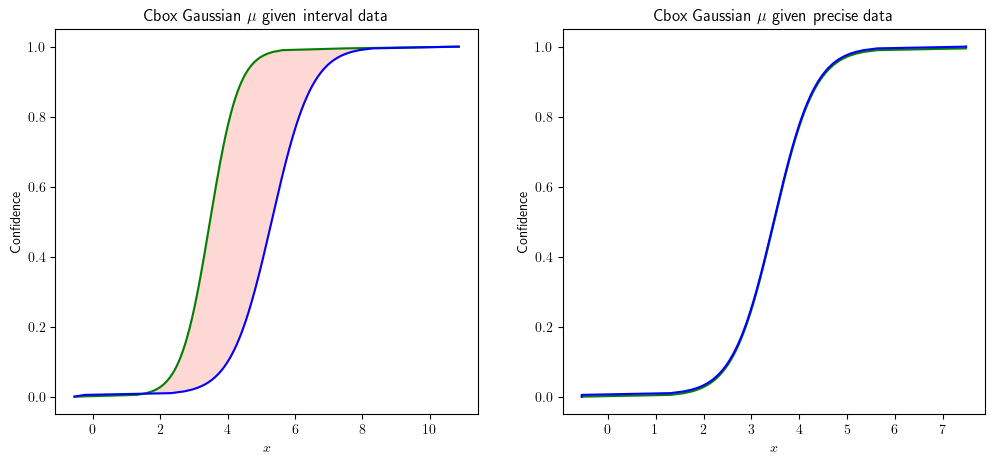

In [28]:
with mpl.rc_context({"text.usetex": True}):
    fig, axs = plt.subplots(1,2, figsize=(12, 5))
    _ = iv_cbox.display(ax = axs[0], style='band', parameter_name=r'Gaussian $\mu$ given interval data')
    _ = lowend_data_cbox.display(ax= axs[1], style='band', parameter_name=r'Gaussian $\mu$ given precise data')

### Uniform

- sample based

# pool

- below is a verification of analytic confidence distribution and a samples-approximated confidence distribution

In [29]:
# data = np.random.normal(size=25)
# # mc_samples based cdf
# scott_mu = CBnormal_mu(data, style='samples')
# scott_mu.shape

In [30]:
# _, ax = tranform_ecdf(s=scott_mu, display=True)
# analytical_mu = CBnormal_mu(data)
# analytical_mu.display(ax=ax, style='band')

In [31]:
# axe = plot_ecdf(scott_mu, label='Monte Carlo samples based')
# axe.plot(x_support, analytical_mu, label='analytical based')
# axe.set_title('confidence distribution for normal mean from sample data')
# axe.legend()